In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

Import "cv2" could not be resolved
Import "skimage.io" could not be resolved
Import "skimage.transform" could not be resolved from source

In [2]:
import zipfile

zip_path = "asl-alphabet.zip"
extract_path = "data/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [21]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.io import imread
from skimage.transform import resize
import pandas as pd

# Set the image size
IMG_SIZE = 64

# Set the path of the dataset
dataset_path = "data/asl_alphabet_train/asl_alphabet_train"


In [15]:
labels_dict = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, 'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, 'Z':25}


def load_data(dataset_path, img_size):
    data = []
    labels = []
    
    # Load the data
    for i, letter in enumerate(os.listdir(dataset_path)):
        if letter in labels_dict:
          print(letter)
          for file in os.listdir(dataset_path + "/" + letter):
              # Read the image
              img = imread(dataset_path + "/" + letter + "/" + file)

              # Resize the image
              img = resize(img, (img_size, img_size))

              # Flatten the image
              img = img.flatten()

              # Add the image and its corresponding label to the data
              data.append(img)
              labels.append(i)

    return np.array(data), np.array(labels)

In [16]:
data, labels = load_data(dataset_path, IMG_SIZE)

R
U
I
N
G
Z
T
S
A
F
O
H
M
J
C
D
V
Q
X
E
B
K
L
Y
P
W


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)


In [18]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [19]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

Accuracy: 98.92307692307692%


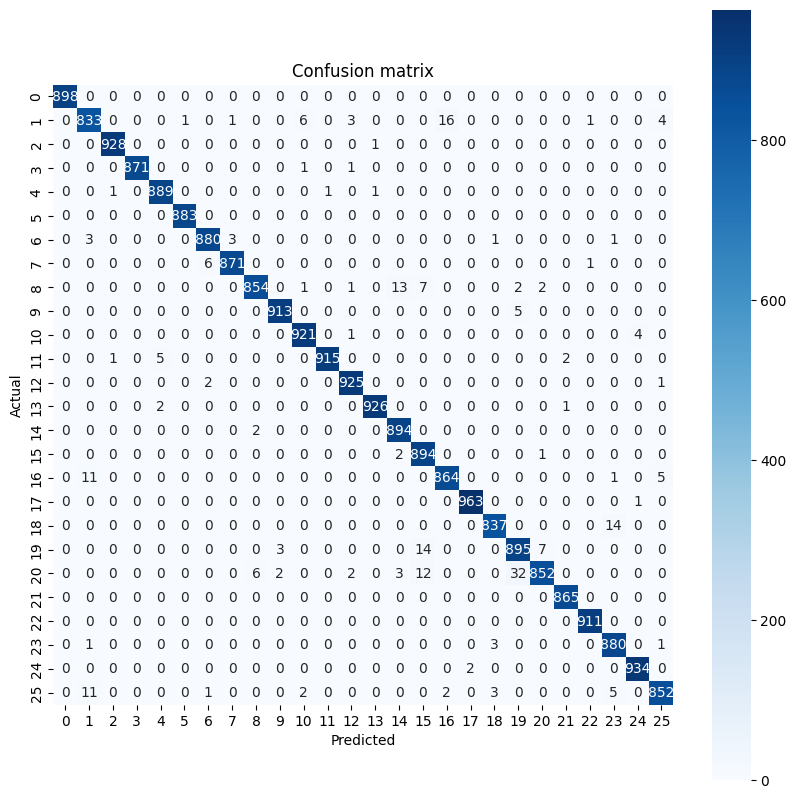

In [22]:
# Print the accuracy
print(f"Accuracy: {accuracy * 100}%")

# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt=".0f", square=True, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.show()